So today i am gonna analyse Friends dataset. Cuz i love friends lol

In [1]:
import pandas as pd

In [2]:
#fdf=friends data frame
fdf=pd.read_csv('friends.csv')
#fidf=friends info data frame
fidf=pd.read_csv('friends_info.csv')

In [3]:
fdf.head(10)

,text,speaker,season,episode,scene,utterance
0,There's nothing to tell! He's just some guy I ...,Monica Geller,1,1,1,1
1,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,1,1,1,2
2,"All right Joey, be nice. So does he have a hum...",Chandler Bing,1,1,1,3
3,"Wait, does he eat chalk?",Phoebe Buffay,1,1,1,4
4,"(They all stare, bemused.)",Scene Directions,1,1,1,5
5,"Just, 'cause, I don't want her to go through w...",Phoebe Buffay,1,1,1,6
6,"Okay, everybody relax. This is not even a date...",Monica Geller,1,1,1,7
7,Sounds like a date to me.,Chandler Bing,1,1,1,8
8,[Time Lapse],Scene Directions,1,1,1,9
9,"Alright, so I'm back in high school, I'm stand...",Chandler Bing,1,1,1,10


In [4]:
fidf.head()

,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
0,1,1,The Pilot,James Burrows,David Crane & Marta Kauffman,1994-09-22,21.5,8.3
1,1,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,1994-09-29,20.2,8.1
2,1,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,1994-10-06,19.5,8.2
3,1,4,The One with George Stephanopoulos,James Burrows,Alexa Junge,1994-10-13,19.7,8.1
4,1,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,1994-10-20,18.6,8.5


Lets start our analysis with some questions:

1. Who talks the most and who talks the least?
    - in terms of number of dialogues

In [5]:
fdf.groupby('speaker')['scene'].sum().sort_values().head(10)
#maximum Rachel Green        63887
#minimum  Attendant             1
        # Jennifer Aniston      1
        # Delivery Girl         1
        # Jo Lynn               1
        # A Casino Boss         1
        # A Tourist             1
        # Woman Giving Birth    1
        # Robin Williams        1

speaker
Attendant             1
Jennifer Aniston      1
Delivery Girl         1
Jo Lynn               1
A Casino Boss         1
A Tourist             1
Woman Giving Birth    1
Robin Williams        1
Mrs. Wallace          2
Female Student        2
Name: scene, dtype: int64

2. Seasonal Dialogue Sum 

- Want to know how talkative the group was each season? Using word_count column, calculate the total number of words spoken by all characters in each season. Use the .groupby() and .sum() methods. 

In [6]:
fdf['total_words']=fdf['text'].str.split().str.len()

In [7]:
fdf.head()

,text,speaker,season,episode,scene,utterance,total_words
0,There's nothing to tell! He's just some guy I ...,Monica Geller,1,1,1,1,11
1,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,1,1,1,2,14
2,"All right Joey, be nice. So does he have a hum...",Chandler Bing,1,1,1,3,16
3,"Wait, does he eat chalk?",Phoebe Buffay,1,1,1,4,5
4,"(They all stare, bemused.)",Scene Directions,1,1,1,5,4


In [8]:
fdf.groupby('season')['total_words'].sum()

season
1     65205
2     64129
3     75710
4     74817
5     74405
6     77765
7     73662
8     71555
9     75523
10    55237
Name: total_words, dtype: int64

3. Average Episode Length 

    - Curious about the pace of the show? Calculate the average number of scenes across all seasons. Use nunique() to avoid counting repeated scenes. 

In [9]:
fdf.groupby('season')['scene'].nunique() #unique scenes in each season

season
1     21
2     16
3     19
4     29
5     17
6     20
7     20
8     16
9     19
10    18
Name: scene, dtype: int64

In [10]:
fdf.groupby('season')['scene'].nunique().mean()
#19.5 scenes avg for all season

np.float64(19.5)

4. Shortest and Longest Dialogues 

    -Ever wondered who had the briefest or the most extended things to say? Find the shortest and longest dialogues spoken by any character using .min() and .max() 

In [11]:
fdf['dialogue_length']=fdf['text'].str.len()

In [12]:
fdf.groupby('speaker')['dialogue_length'].agg(['min','max'])

,min,max
speaker,,
#ALL#,2,73
1st Customer,25,25
A Casino Boss,52,52
A Crew Member,14,16
A Disembodied Voice,15,15
...,...,...
Woman On Tv,19,80
Woman's Voice,74,74
Writer,71,71


5. Comprehensive Character Stats 
    - Dive deeper into dialogue details! Calculate multiple statistics (mean, standard deviation, minimum, maximum, and median) for dialogue lengths of each character using .agg(). Remember to use the previously calculated dialogue_length column. 

In [13]:
fdf.groupby('speaker')['dialogue_length'].agg(['mean','median','min','max','std'])

,mean,median,min,max,std
speaker,,,,,
#ALL#,12.028818,8.0,2,73,11.069892
1st Customer,25.000000,25.0,25,25,NaN
A Casino Boss,52.000000,52.0,52,52,NaN
A Crew Member,15.333333,16.0,14,16,1.154701
A Disembodied Voice,15.000000,15.0,15,15,NaN
...,...,...,...,...,...
Woman On Tv,41.000000,24.0,19,80,33.867388
Woman's Voice,74.000000,74.0,74,74,NaN
Writer,71.000000,71.0,71,71,NaN


6. Understanding .groupby() Function 

    - Why would you use the .groupby() function when analyzing dialogue data from "F.R.I.E.N.D.S"? 

        To sum the number of dialogues across all seasons. F

        To find the total number of episodes in the series. F

        To categorize data into subsets that share common traits, such as dialogues per character per season. TRUE

        To calculate the mean length of episodes. F

7. Custom Aggregation: Unique Words 

    - Explore the vocabulary range of the characters. Define and use a custom aggregation function to count unique words spoken by each character using agg(). 

In [14]:
def unique_words(string): #to count unique words in a text
    return len(set(' '.join(string).split()))

In [15]:
fdf.groupby('speaker')['text'].agg(unique_words)

speaker
#ALL#                  394
1st Customer             3
A Casino Boss            9
A Crew Member            9
A Disembodied Voice      2
                      ... 
Woman On Tv             22
Woman's Voice           13
Writer                  12
Zack                   119
Zoe                      4
Name: text, Length: 699, dtype: int64

8. Phoebe’s Family History 

    - Phoebe's family stories are as complex as they are entertaining. Use a custom aggregation function to summarize the most frequently mentioned family members. Store the result in family_mentions variable. 

In [16]:
def most_frequent_mentions(dialogues):
    words = pd.Series(' '.join(dialogues).split())
    return words[words.str.lower().isin(['mom', 'dad', 'sister', 'brother', 'family'])].value_counts().idxmax()

In [17]:
family_mentions=fdf[fdf['speaker']=='Phoebe Buffay'].groupby('season')['text'].agg(most_frequent_mentions)

family_mentions

season
1        mom
2        dad
3        Mom
4        mom
5        mom
6     sister
7        mom
8        dad
9     family
10    family
Name: text, dtype: object

9. Using Aggregation Functions 

    - What is the advantage of using .agg() with multiple aggregation functions in a pandas DataFrame? 

        It automatically sorts the DataFrame by the index. 

        It allows for the execution of multiple operations in a single line of code, improving code efficiency. TRUE

        It reduces the memory usage of the DataFrame. 

        It is the only way to perform operations on a DataFrame. 

10. The One Where Joey Speaks 

   - How much does Joey talk each season? Let's find out by counting the number of lines Joey speaks each season. Store the result in the variable joey_lines. 

In [18]:
joey_lines=fdf[fdf['speaker']=='Joey Tribbiani'].groupby('season')['text'].count()
joey_lines

season
1     640
2     654
3     774
4     838
5     935
6     909
7     933
8     909
9     856
10    723
Name: text, dtype: int64

11. Chandler's Job Mystery 

    - Throughout the series, Chandler's job remained a subject of confusion and humor. Your task is to explore dialogues where Chandler tries to describe his profession, highlighting how the confusion about his job role builds throughout the series. 

    Filter out for words like job or work using str.contains method. 

    Don't forget to use size() at the end to count the number of rows. 

    Store the result in chandler_job_explanations variable. 

In [19]:
job_mentions=fdf[fdf['text'].str.contains("job|work",case=False)]
job_mentions.head()

,text,speaker,season,episode,scene,utterance,total_words,dialogue_length
0,There's nothing to tell! He's just some guy I ...,Monica Geller,1,1,1,1,11,56
120,"Love is sweet as summer showers, love is a won...",Phoebe Buffay,1,1,3,1,32,198
202,"All right, kids, I gotta get to work. If I don...",Chandler Bing,1,1,11,22,21,112
203,"So, like, you guys all have jobs?",Rachel Green,1,1,11,23,7,33
204,"Yeah, we all have jobs. See, that's how we buy...",Monica Geller,1,1,11,24,11,53


In [20]:
chandler_job_mention=job_mentions[job_mentions['speaker']=='Chandler Bing']
chandler_job_mention.head()

,text,speaker,season,episode,scene,utterance,total_words,dialogue_length
202,"All right, kids, I gotta get to work. If I don...",Chandler Bing,1,1,11,22,21,112
405,"I mean presumably, the biggest part of your jo...",Chandler Bing,1,2,3,51,11,56
637,"Oh, Satan's minions at work again...",Chandler Bing,1,3,3,15,6,36
1469,What 'not work out'? I'm seeing her again on T...,Chandler Bing,1,6,3,31,16,86
2481,"Y'know, if you're gonna work late, I could loo...",Chandler Bing,1,10,3,28,14,66


In [21]:
chandler_job_explanation=chandler_job_mention.groupby('season')['text'].count()
chandler_job_explanation

season
1     17
2     17
3     12
4     11
5     14
6     19
7     12
8     17
9     31
10    13
Name: text, dtype: int64

12. Flashback Flashes 

    - F.R.I.E.N.D.S often took us down memory lane with flashbacks. Identify episodes with the most references to past events. Store the result in the variable flashback_mentions. 

    Don't forget to use size() at the end to count the number of rows. 

     Identify episodes with frequent flashbacks by searching for phrases like 'remember when' and 'back when'. 
     Then group and count these instances by season and episode, highlighting how the series revisits its past.
flashback_mentions = ...

In [22]:
fdf[fdf['text'].str.contains("remember when | back when",case=False)].head()

,text,speaker,season,episode,scene,utterance,total_words,dialogue_length
262,You're welcome. I remember when I first came t...,Phoebe Buffay,1,1,14,6,72,390
469,Remember when we were in high school together?,Rachel Green,1,2,5,28,8,46
852,Remember when we went to Central Park and rent...,Rachel Green,1,3,14,1,13,71
1499,"Yeah, you are, Monica. Remember when I lived w...",Phoebe Buffay,1,6,4,15,20,107
3314,"Remember when you were a little kid, I used to...",Joey Tribbiani Sr.,1,13,3,6,22,100


In [23]:
flashback_mentions=fdf[fdf['text'].str.contains("remember when | back when",case=False)].groupby(['season','episode']).size()
flashback_mentions

season  episode
1       1          1
        2          1
        3          1
        6          1
        13         1
        19         1
2       4          1
        6          1
        12         1
        14         1
        16         1
        24         1
3       3          1
        10         1
        13         1
        15         1
        17         1
4       23         1
5       2          1
        5          1
        6          1
        8          1
        10         2
6       6          1
        7          2
        10         1
        17         1
        18         1
7       2          1
        3          1
        6          1
        15         1
8       5          1
        18         1
9       6          1
        24         1
dtype: int64

13. The One with the Catchphrases 

    - "how you doin'?" Joey's catchphrase is legendary. Find the number of times Joey uses his famous line compared to others. 

    Dont forget to use size() at the end to count the number of rows. 

In [24]:
fdf[fdf['text'].str.contains('how you doin\'?',case=False)]

,text,speaker,season,episode,scene,utterance,total_words,dialogue_length
214,So how you doing today? Did you sleep okay? Ta...,Monica Geller,1,1,11,34,16,80
4641,"hey, fella! How you doing?",Ross Geller,1,17,13,14,5,26
6067,"So, I understand you're thinking of having a b...",Dr. Franzblau,1,23,2,8,26,150
9236,How you doin'?,Susan Bunch,2,11,10,2,3,14
9622,How you doin there squirmy?,Susie Moss,2,13,6,4,5,27
16228,"Hey, Rach, how you doing with The Shining?",Joey Tribbiani,3,13,10,13,8,42
23380,"Oh-oh-oh-oh, how I do it is, I look a woman up...",Joey Tribbiani,4,13,8,21,19,86
23382,"Hey, how you doin'?",Joey Tribbiani,4,13,8,23,4,19
23384,"You know what, I'm gonna do that, I'm gonna ca...",Rachel Green,4,13,8,25,109,549
23480,"Yes! I will! Absolutely! Hello, Rachel. Hi, Jo...",Rachel Green,4,13,13,5,39,206


In [25]:
fdf[fdf['text'].str.contains('how you doin\'?',case=False)].groupby('speaker').size()

speaker
Dana Keystone        1
Dr. Franzblau        1
Frank Buffay Jr.     1
Joey Tribbiani      25
Monica Geller        2
Rachel Green         4
Ross Geller          4
Susan Bunch          1
Susie Moss           1
Tag Jones            1
dtype: int64

14. Ross's Weddings 

   - Ah, Ross and his weddings—always a spectacle! Dive into the data to find out which wedding episode had the most dialogue. Was it Emily’s, Rachel’s, or perhaps Carol’s? Enter the Episode number. 

In [26]:
fdf[(fdf['text'].str.contains('wedding',case=False))& (fdf['speaker']=='Ross Geller')].head()

,text,speaker,season,episode,scene,utterance,total_words,dialogue_length
428,I'm not gonna tell you what they spent on that...,Ross Geller,1,2,4,18,20,103
9023,Why wouldn't I want to come? I had fun at the ...,Ross Geller,2,11,1,16,13,60
9208,Well then that's it. And if George and Adelaid...,Ross Geller,2,11,7,20,41,210
12492,"So don't, I don't see why we have to go to thi...",Ross Geller,2,24,3,5,18,93
12582,"Sweetie, it's be gonna okay, all right. It's a...",Ross Geller,2,24,7,6,16,92


In [27]:
fdf[(fdf['text'].str.contains('wedding',case=False))& (fdf['speaker']=='Ross Geller')].groupby(['season','episode']).count().sort_values(by='dialogue_length')

#Season 4 episode 23

text  speaker  scene  utterance  total_words  dialogue_length
season episode                                                               
1      2           1        1      1          1            1                1
4      20          1        1      1          1            1                1
5      2           1        1      1          1            1                1
7      9           1        1      1          1            1                1
       6           1        1      1          1            1                1
       2           1        1      1          1            1                1
6      5           1        1      1          1            1                1
5      12          1        1      1          1            1                1
7      23          1        1      1          1            1                1
       20          1        1      1          1            1                1
8      3           1        1      1          1            1                1
       2           1        1      1          1            1                1
4      22          2        2      2          2            2                2
       24          2        2      2          2            2                2
2      11          2        2      2          2            2                2
       24          2        2      2          2            2                2
8      18          2        2      2          2            2                2
7      11          2        2      2          2            2                2
10     12          5        5      5          5            5                5
4      23          6        6      6          6            6                6

15. Filtering with filter()

    - How does the .filter() method differ from .loc[] in the context of pandas group operations?
    - Ans - .filter() allows for conditional checking within groups, returning data based on the properties of the group.

16. Monica's Cleaning Episodes 

    - Monica’s cleanliness is legendary. Calculate the number of times Monica mentions "clean," "dust," or "soap" in each season. Who knew cleaning could be this fun to analyze? Store the result in cleaning_mentions variable. 

In [28]:
cleaning_mentions=fdf[(fdf['speaker']=='Monica Geller')&(fdf['text'].str.contains("soap|dust|clean",case=False))].groupby('season')['text'].size()

cleaning_mentions

season
1     1
2     2
4     3
5     3
6     2
7     2
8     8
9     4
10    4
Name: text, dtype: int64

17. The One with the Longest Monologue 

    - Identify the season-wise longest dialogue that was witnessed. Was it during one of Ross's scientific explanations or Monica's detailed anecdotes? 

    Store the result in max_dialogue_length variable. 

In [29]:
max_dialogue_length=fdf.groupby('season')['dialogue_length'].max()
max_dialogue_length

season
1      762
2      618
3      617
4      820
5      928
6      739
7     1267
8      986
9     4008
10    4217
Name: dialogue_length, dtype: int64

In [30]:
fdf.groupby('season')[['dialogue_length','text']].max()

,dialogue_length,text
season,,
1,762,you don't have insurance?
2,618,this summer?
3,617,yeah-yeah-yeah!!
4,820,{Transcriber's Note This is orginally where th...
5,928,"{Y'know, sometimes I think the script writers ..."
6,739,{Transcriber's Note Please correct my French h...
7,1267,{Transcriber's Note She puts the key into the ...
8,986,{Transcriber's Note Tradition was broken here ...
9,4008,"your welcome again, I'm gonna make some coffee..."


In [31]:
fdf[fdf['dialogue_length']==4217]

,text,speaker,season,episode,scene,utterance,total_words,dialogue_length
63950,[Scene: Monica and Chandler's. They are prepar...,Scene Directions,10,7,12,0,759,4217


18. The One with the Routine 
    - Ross and Monica’s routine dance is unforgettable. Find out which season had the most dance or music-related dialogues using the apply() method. Store the results in dance_music_dialogues variable. 

For this activity use the fidf dataset. 
Find seasons with the most mentions of 'Routine' or 'Dance' in the title and count dialogues

In [32]:
fidf.head()

,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
0,1,1,The Pilot,James Burrows,David Crane & Marta Kauffman,1994-09-22,21.5,8.3
1,1,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,1994-09-29,20.2,8.1
2,1,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,1994-10-06,19.5,8.2
3,1,4,The One with George Stephanopoulos,James Burrows,Alexa Junge,1994-10-13,19.7,8.1
4,1,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,1994-10-20,18.6,8.5


In [41]:
fidf[fidf['title'].str.contains('Dance|Routine',case=False)].max()

season                                      6
episode                                    10
title                The One with the Routine
directed_by                   Kevin S. Bright
written_by                        Brian Boyle
air_date                           1999-12-16
us_views_millions                        22.4
imdb_rating                               8.6
dtype: object

19. Chandler in a Box 
    - When Chandler spends time in a box as penance, the conversation around him varies dramatically. Evaluate the average number of words spoken by each character in this episode to see who talks most while he's boxed up. 

Note : For finding the solution of chandler_box use the friends_info_df dataset. 

Filter with the exact season and epsiode number, that you get from the chandler_box. 

Store the result in avg_words_per_character variable. 

In [45]:
fidf[fidf['title'].str.contains('Chandler|Box',case=False)]

,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
58,3,11,The One Where Chandler Can't Remember Which Si...,Terry Hughes,Alexa Junge,1997-01-09,29.80,8.6
79,4,7,The One Where Chandler Crosses the Line,Kevin S. Bright,Adam Chase,1997-11-13,26.40,8.7
80,4,8,The One with Chandler in a Box,Peter Bonerz,Michael Borkow,1997-11-20,26.80,9.1
108,5,12,The One with Chandler's Work Laugh,Kevin S. Bright,Alicia Sky Varinaitis,1999-01-21,24.80,8.3
134,6,14,The One Where Chandler Can't Cry,Kevin S. Bright,Andrew Reich & Ted Cohen,2000-02-10,23.80,8.6
153,7,8,The One Where Chandler Doesn't Like Dogs,Kevin S. Bright,Patty Lin,2000-11-23,16.57,8.2
167,7,22,The One with Chandler's Dad,Kevin S. Bright & Gary Halvorson,Story by : Gregory S. MalinsTeleplay by : Bria...,2001-05-10,17.23,8.4
168,7,23,The One with Monica and Chandler's Wedding,Kevin S. Bright,Gregory S. MalinsMarta Kauffman & David Crane,2001-05-17,30.05,8.9
169,7,24,The One with Monica and Chandler's Wedding,Kevin S. Bright,Gregory S. MalinsMarta Kauffman & David Crane,2001-05-17,30.05,9.2
182,8,13,The One Where Chandler Takes a Bath,Ben Weiss,Vanessa McCarthy,2002-01-17,29.24,8.6


In [47]:
chandler_box=fidf[fidf['title'].str.contains('The One with Chandler in a Box',case=False)]

In [48]:
chandler_box

,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
80,4,8,The One with Chandler in a Box,Peter Bonerz,Michael Borkow,1997-11-20,26.8,9.1


In [50]:
fdf[(fdf['season']==4) & (fdf['episode']==8)]

,text,speaker,season,episode,scene,utterance,total_words,dialogue_length
21806,"[Scene: Chandler and Joey's, Joey is sitting a...",Scene Directions,4,8,1,1,17,99
21807,Hello.,Joey Tribbiani,4,8,1,2,1,6
21808,"Hey, it's me. I know you can't stand to be in ...",Chandler Bing,4,8,1,3,29,131
21809,(Pause),Scene Directions,4,8,1,4,1,7
21810,(The phone rings again.),Scene Directions,4,8,1,5,4,24
...,...,...,...,...,...,...,...,...
22104,He's taking her purse!,Ross Geller,4,8,9,5,4,22
22105,"Uhh, that's not them. I'm gonna go call the po...",Joey Tribbiani,4,8,9,6,10,51
22106,"Oh, there they are!",Phoebe Buffay,4,8,9,7,4,19
22107,(They watch them making up and sigh),Scene Directions,4,8,9,8,7,36


In [55]:
avg_words_per_character=fdf[(fdf['season']==4) & (fdf['episode']==8)].groupby('speaker')['total_words'].mean()

In [56]:
avg_words_per_character

speaker
Chandler Bing       13.022727
Doctor               8.000000
Gunther             13.000000
Joey Tribbiani      10.304348
Kathy               15.000000
Monica Geller        8.208333
Nurse               11.000000
Phoebe Buffay       12.208333
Rachel Green         9.142857
Ross Geller         10.323529
Scene Directions     9.611111
Timothy Burke        6.250000
Voice               14.500000
Name: total_words, dtype: float64

20. Transformations with .transform() 
    - Why is the .transform() method important in data processing with pandas? 
    - Ans: To apply a function that modifies each group's data while retaining the original DataFrame structure, facilitating standardized or normalized outputs. 

21. Dialogue Transformation 
    - Normalize dialogue lengths for each character by subtracting the mean and dividing by the standard deviation using .transform(). 

Remember to use the previously calculated dialogue_length column. 

In [60]:
fdf['normalized_length']=(fdf['dialogue_length']-fdf['dialogue_length'].mean())/fdf['dialogue_length'].std()

In [61]:
fdf['normalized_length']

0        0.020605
1        0.418366
2        0.285779
3       -0.509742
4       -0.476595
           ...   
67368   -0.526315
67369    0.368646
67370   -0.625756
67371   -0.377155
67372   -0.708622
Name: normalized_length, Length: 67373, dtype: float64

22. Which Episode had the hearts of the audience ?

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Dell\AppData\Local\Temp\ipykernel_9672\2105122127.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='title', data=top_episodes, palette='viridis')


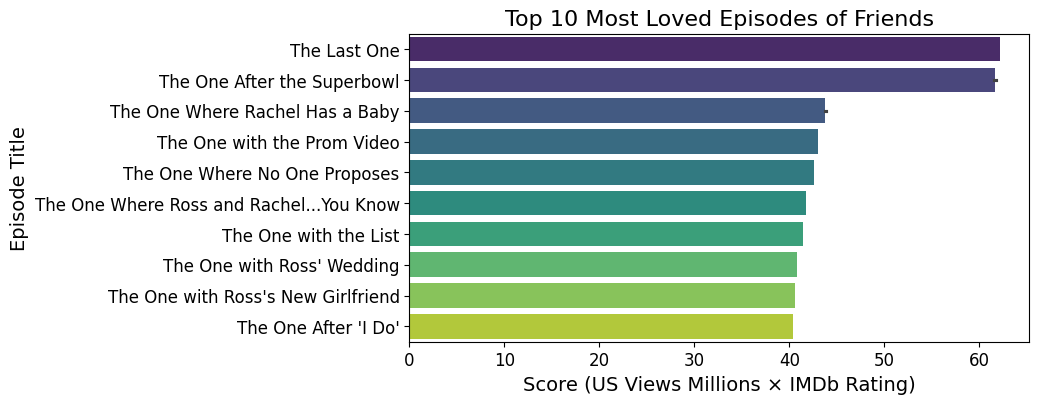

In [ ]:
# Calculate a score by combining views and IMDb ratings
fidf ['score'] = fidf ['us_views_millions'] + fidf ['imdb_rating']

# Get the top 10 episodes by score
top_episodes = fidf .sort_values(by='score', ascending=False).head(13)

# Set up the matplotlib figure
plt.figure(figsize=(8, 4))
sns.barplot(x='score', y='title', data=top_episodes, palette='viridis')

# Add titles and labels
plt.title('Top 10 Most Loved Episodes of Friends', fontsize=16)
plt.xlabel('Score (US Views Millions × IMDb Rating)', fontsize=14)
plt.ylabel('Episode Title', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

The Dynamics of Ross and Rachel’s Relationship

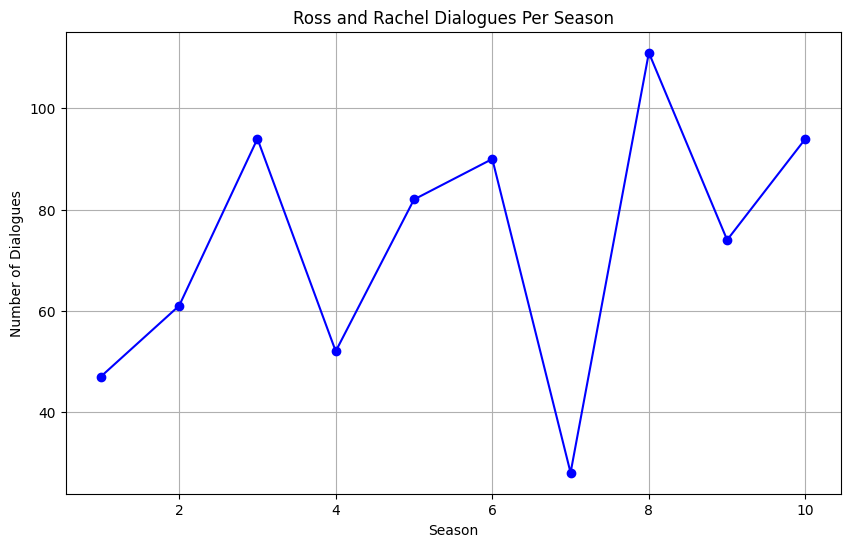

In [73]:
# Filter dialogues between Ross and Rachel
ross_rachel_dialogues = fdf[(fdf['speaker'] == 'Ross Geller') & (fdf['text'].str.contains('Rachel')) |
                                   (fdf['speaker'] == 'Rachel Green') & (fdf['text'].str.contains('Ross'))]

# Group by season and count dialogues
dialogues_per_season = ross_rachel_dialogues.groupby('season').size()

# Plotting
plt.figure(figsize=(10, 6))
dialogues_per_season.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title('Ross and Rachel Dialogues Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Dialogues')
plt.grid(True)
plt.show()

Coffee Time Trends at Central Perk

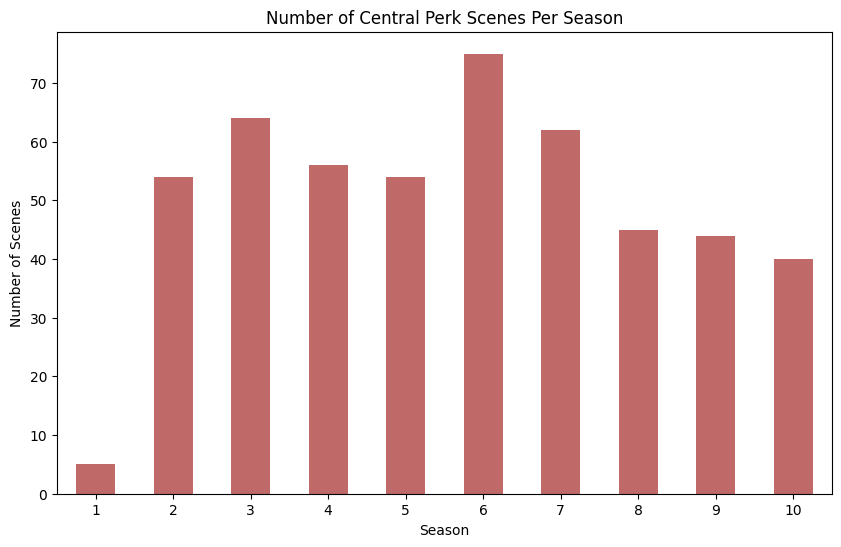

In [74]:
# Filter for scenes at Central Perk
central_perk_scenes = fdf[fdf['text'].str.contains('Central Perk', na=False)]

# Group by season and count the number of scenes
scenes_per_season = central_perk_scenes.groupby('season').size()

# Plotting
plt.figure(figsize=(10, 6))
scenes_per_season.plot(kind='bar', color='brown', alpha=0.7)
plt.title('Number of Central Perk Scenes Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Scenes')
plt.xticks(rotation=0)
plt.show()

Dynamics of the Main Six Characters

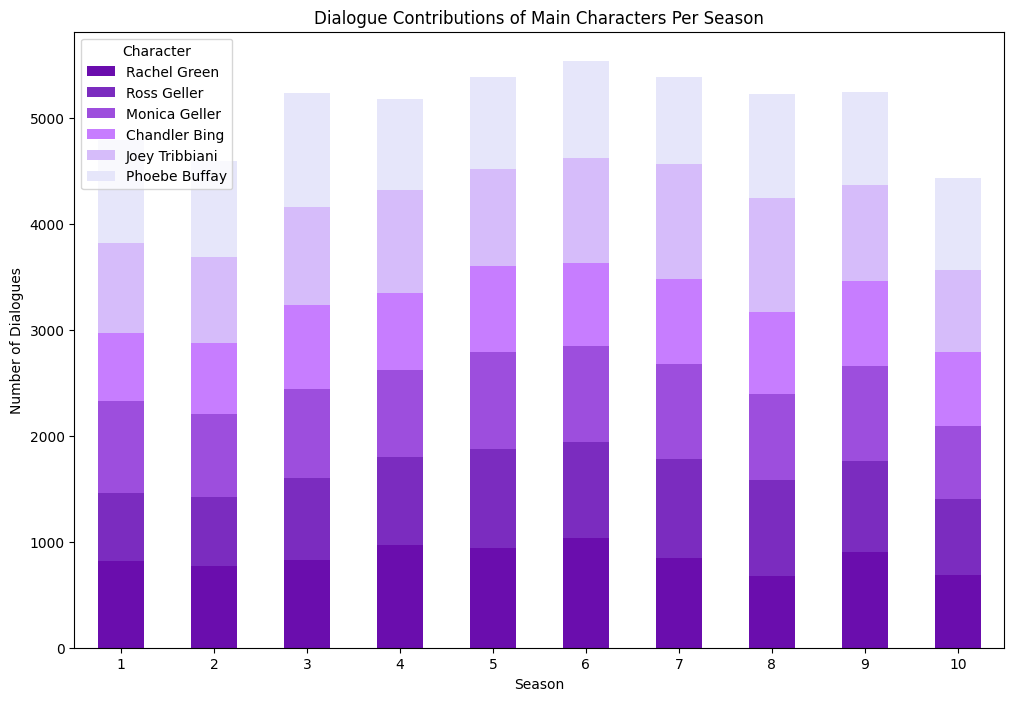

In [75]:
# Filter out the main six characters
main_characters = ['Rachel Green', 'Ross Geller', 'Monica Geller', 'Chandler Bing', 'Joey Tribbiani', 'Phoebe Buffay']
filtered_df = fdf[fdf['speaker'].isin(main_characters)]

# Group by season and speaker, then count dialogues
dialogues_per_season = filtered_df.groupby(['season', 'speaker']).size().unstack()

# Define a color palette for the characters
colors = ['#6A0DAD', '#7B2CBF', '#9D4EDD', '#C77DFF', '#D6BCFA', '#E6E6FA']  # Soft pastel colors

# Plotting using a stacked bar chart
dialogues_per_season.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Dialogue Contributions of Main Characters Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Dialogues')
plt.legend(title='Character', labels=main_characters)
plt.xticks(rotation=0)
plt.show()